# Dimensionality Reduction

In this exercise, we will learn several dimensionality reduction methods using the Penguin dataset.

## Preprocessing


In [15]:
import seaborn as sns
import pandas as pd

# Load the penguins dataset
data_table = sns.load_dataset("penguins")
data_table.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We will use (1) species as the *class* labels, and (2) other columns as the *features*.

Let's preprocess the data by 
1. Impute the missing value with the most frequent value
2. Represent the categorical variables using one-hot encoding

Let's create variable `y` and variable `X` for the class and features, respectively.


In [16]:
# TODO: Impute the missing values
for column in data_table.columns:
    data_table[column] = data_table[column].fillna(
        data_table[column].dropna().mode()[0]
    )

In [29]:
# TODO: Represent the island and sex using one-hot encoding
categorical_cols = ["island", "sex"]
prep_data_table = pd.get_dummies(data_table, columns=categorical_cols, drop_first=True)

X = prep_data_table.drop(columns=["species"]).values.astype(float)
y = prep_data_table["species"].values
feature_cols = prep_data_table.drop(columns=["species"]).columns

In [31]:
X = X.astype(float)
ylabel, yids = np.unique(y, return_inverse=True)

# Principal Component Analysis

Let's implement PCA using numpy. 
1. Center the data (the average of each feature is 0)
2. Compute the covariance matrix
3. Compute the 2 eigenvectors with the largest eigenvalues
4. Project X to 2D by using the eigenvectors


In [32]:
import numpy as np

# TODO: Center the data
Xc = X - X.mean(axis=0)

# TODO: Compute the covariance matrix
Cov = Xc.T @ Xc / (Xc.shape[0] - 1)

# TODO: Compute the 2 largest eigenvalues and corresponding eigenvectors
# Use np.linalg.eig or scipy.linalg.eigs
w, v = np.linalg.eig(Cov)
order = np.argsort(-w)[:2]
w, v = w[order], v[:, order]

# TODO: Project the data onto the 2D by using the eigenvectors
Xproj = Xc @ v

Let's visualize the projected data. Your todo is to properly labels X and Y as "PC1" and "PC2", respectively. You can do this by ax.set_xlabel and ax.set_ylabel.


Text(0, 0.5, 'PC2')

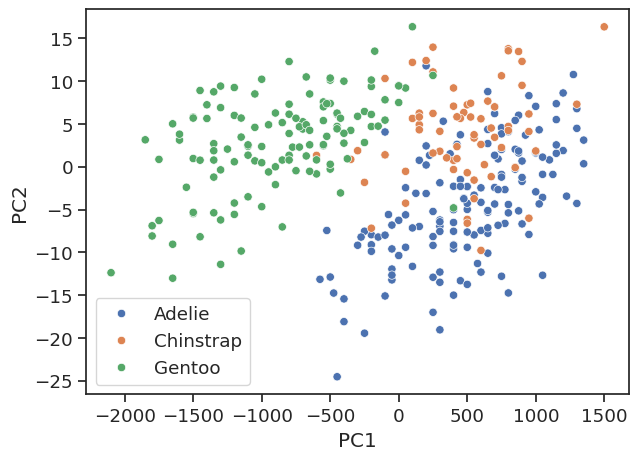

In [35]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Linear Discriminant Analysis

In LDA, we will 
1) Compute the within-class and between-class scatter matrices
2) Compute the generalized eigenvalue problem to generate the eigenvectors. 
3) Project the data to 2D by using the eigenvectors. 


In [47]:
from scipy import sparse

ylab = np.unique(y)
Sw = np.zeros((X.shape[1], X.shape[1]))  # Within class covariance
Sb = np.zeros((X.shape[1], X.shape[1]))  # Between class covariance

# TODO: Compute the within-class scatter matrix
# Hint
# - Sume of covariances over all classes
# - np.cov is useful to compute the covariance of each class
ylab = np.unique(y)
Sw = np.zeros((X.shape[1], X.shape[1]))
for yc in ylab:
    Xclass = X[y == yc]
    Sw += np.cov(Xclass.T)

# TODO: Compute the between-class scatter matrix
# Hint:
#  1. Compute the center of the data, m
#  2. Compute the center of individual classes, mc.
#  3. Compute the variance of mc over all classes with m as the center, namely \sum (mc - m)(mc - m)^T
mu = X.mean(axis=0)
for i, yc in enumerate(ylab):
    mc = X[y == yc].mean(axis=0)
    Sb += np.outer((mc - mu), (mc - mu).T)


# TODO: Compute the generalized eigenvalue problem
w, v = sparse.linalg.eigs(Sb, M=Sw, k=2, which="LM")


# TODO: Project the data
Xproj = X @ v

/home/skojaku/miniforge3/envs/applsoftcomp/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/skojaku/miniforge3/envs/applsoftcomp/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/skojaku/miniforge3/envs/applsoftcomp/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/home/skojaku/miniforge3/envs/applsoftcomp/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


Text(0, 0.5, 'LDA 2')

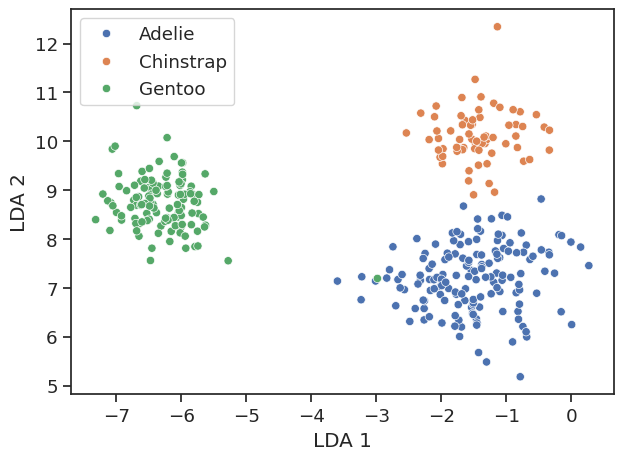

In [49]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("LDA 1")
ax.set_ylabel("LDA 2")

# Multi Dimensional Scaling (MDS)


Let's apply the MDS using scikit learn package: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

Text(0, 0.5, '')

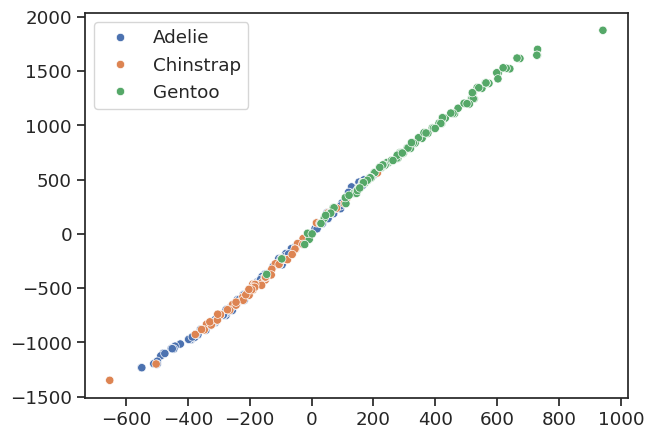

In [51]:
from sklearn.manifold import MDS

# TODO: See the documentation for the MDS function and use it to project the data into 2D
mds_model = MDS(n_components=2, normalized_stress='auto')
Xproj = mds_model.fit_transform(X)


# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

### Why was MDS not useful for this dataset? Can you think of any way to imporve the results 🤔?

# Isomap
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

Text(0, 0.5, '')

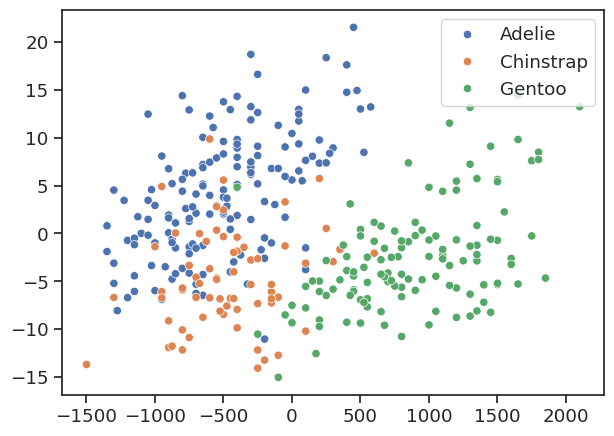

In [54]:
from sklearn.manifold import Isomap

# TODO: See the documentation for the MDS function and use it to project the data into 2D
mds_model = Isomap(n_components=2, n_neighbors=100)
Xproj = mds_model.fit_transform(X)


# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

### Play with the number of neighbors and think about it's effect. Can you also explain why the effect is observed 🤔?



# t-SNE


https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Text(0, 0.5, '')

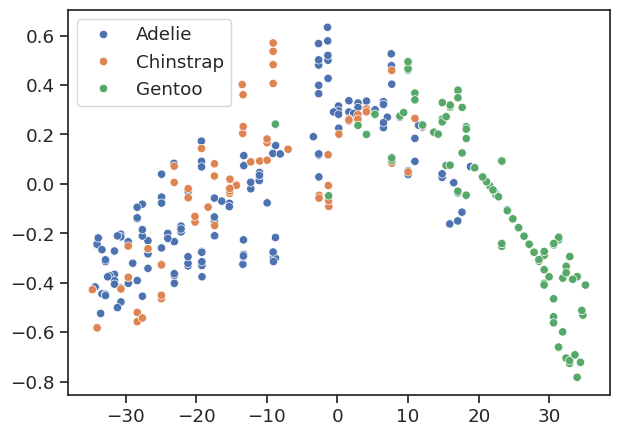

In [56]:
from sklearn.manifold import TSNE

# TODO: See the documentation for the MDS function and use it to project the data into 2D
mds_model = TSNE(n_components=2, perplexity = 30)
Xproj = mds_model.fit_transform(X)


# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

# UMAP (Optional)

- https://umap-learn.readthedocs.io/en/latest/api.html


/home/skojaku/miniforge3/envs/applsoftcomp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, '')

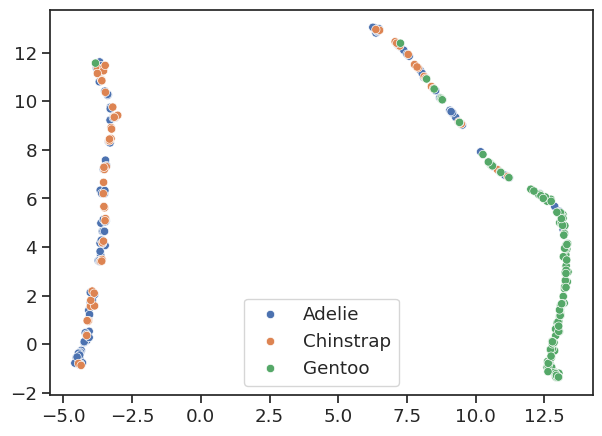

In [57]:
import umap


# TODO: See the documentation for the MDS function and use it to project the data into 2D
mds_model = umap.UMAP(n_components=2, n_neighbors=100)
Xproj = mds_model.fit_transform(X)


# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")